In [26]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data analysis:

### Which station has the most number of units as of today?
Used the data of Remote Unit/Control Area/Station Name Key to determine the number of units for each station.

In [27]:
station_key_df = pd.read_excel('http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls')

In [28]:
station_key_df.head()

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


In [29]:
## Changing the column names according to the new format
station_key_df.rename(columns = {'Station':'STATION', 'Line Name' : 'LINENAME', 'Division': 'DIVISION', 'Remote':'UNIT', 'Booth':'C/A'}, inplace = True)

In [30]:
units_count_df = station_key_df[['UNIT','STATION']].groupby(['STATION'],sort = True).agg({'UNIT':'nunique'}).sort_values(by = 'UNIT', ascending = False ).reset_index()

In [31]:
units_count_df.head()

,STATION,UNIT
0,86 ST,5
1,CANAL ST,5
2,42 ST-GRD CNTRL,4
3,34 ST-PENN STA,4
4,FULTON ST,4


In [32]:
print('Station with the most number of units as of today is {} with {} units and {} with {} units '.
      format(units_count_df['STATION'].iloc[0] , units_count_df['UNIT'].iloc[0],units_count_df['STATION'].iloc[1] , units_count_df['UNIT'].iloc[1]))

Station with the most number of units as of today is 86 ST with 5 units and CANAL ST with 5 units 


#### Cross verifying with the last week data - 03/10/2018

In [33]:
march_2018_df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180303.txt')

In [34]:
march_2018_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [36]:
march_2018_df = march_2018_df[['UNIT','STATION']].groupby(['STATION'],sort = True).agg({'UNIT':'nunique'}).sort_values(by = 'UNIT', ascending = False ).reset_index()

In [37]:
march_2018_df.head()

,STATION,UNIT
0,23 ST,6
1,86 ST,5
2,CANAL ST,5
3,GRD CNTRL-42 ST,4
4,125 ST,4


In [38]:
march_2018 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180303.txt')

In [39]:
df = pd.DataFrame(march_2018, columns = ['STATION', 'UNIT'])

In [40]:
df3 = df[df['STATION'] == '23 ST']

In [41]:
unit_23_list = df3['UNIT'].tolist()

In [42]:
myset = set(unit_23_list)

In [43]:
print(myset)

{'R131', 'R111', 'R203', 'R453', 'R190', 'R083'}


In [44]:
df4 = df[df['STATION'] == '86 ST']

In [45]:
unit_86_list = df4['UNIT'].tolist()

In [46]:
myset2 = set(unit_86_list)
print(myset2)

{'R179', 'R215', 'R167', 'R186', 'R397'}


##### With further analysis found that R083, R203, R453, R359 belong to stations 23 ST-5 ave, 23 ST-6 ave and court sq-23 st. So 86th ST and Canal ST station has the most number of units.

## The rest of the questions are based on 2013 data. Collecting and cleaning 2013 data to usable format.

In [47]:
# Collect data from all 2013 urls
data_link = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
start_date = datetime.date(2013,1,5) 
end_date = datetime.date(2014,1,4) #Contains last 3 days of December 2013
all_urls = []

temp = start_date
while temp <= end_date:
    all_urls.append(data_link + temp.strftime("%y%m%d") + ".txt")
    temp += datetime.timedelta(days=7)


In [48]:
# Read all the urls and store each dataframe in a list
total_data = []

for i in all_urls:
    total_data.append(pd.read_csv(i,header=None,names = ["C/A","UNIT","SCP","DATE1","TIME1","DESC1","ENTRIES1","EXITS1",
                              "DATE2","TIME2","DESC2","ENTRIES2","EXITS2",
                              "DATE3","TIME3","DESC3","ENTRIES3","EXITS3","DATE4","TIME4","DESC4","ENTRIES4","EXITS4",
                              "DATE5","TIME5","DESC5","ENTRIES5","EXITS5","DATE6","TIME6","DESC6","ENTRIES6","EXITS6",
                              "DATE7","TIME7","DESC7","ENTRIES7","EXITS7","DATE8","TIME8","DESC8","ENTRIES8","EXITS8"]))

In [49]:
total_data[0].head()

,C/A,UNIT,SCP,DATE1,TIME1,DESC1,ENTRIES1,EXITS1,DATE2,TIME2,...,DATE7,TIME7,DESC7,ENTRIES7,EXITS7,DATE8,TIME8,DESC8,ENTRIES8,EXITS8
0,A002,R051,02-00-00,12-29-12,03:00:00,REGULAR,3929425,1354918,12-29-12,07:00:00,...,12-30-12,03:00:00,REGULAR,3930369.0,1355149.0,12-30-12,07:00:00,REGULAR,3930380.0,1355156.0
1,A002,R051,02-00-00,12-30-12,11:00:00,REGULAR,3930423,1355207,12-30-12,15:00:00,...,12-31-12,11:00:00,REGULAR,3931252.0,1355558.0,12-31-12,15:00:00,REGULAR,3931566.0,1355630.0
2,A002,R051,02-00-00,12-31-12,19:00:00,REGULAR,3932088,1355684,12-31-12,23:00:00,...,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,01-01-13,23:00:00,REGULAR,3932782.0,1355864.0
3,A002,R051,02-00-00,01-02-13,03:00:00,REGULAR,3932806,1355869,01-02-13,07:00:00,...,01-02-13,15:00:00,REGULAR,3933226.0,1356280.0,01-02-13,19:00:00,REGULAR,3934152.0,1356375.0
4,A002,R051,02-00-00,01-02-13,23:00:00,REGULAR,3934459,1356406,01-03-13,03:00:00,...,01-03-13,11:00:00,REGULAR,3934669.0,1356720.0,01-03-13,15:00:00,REGULAR,3934871.0,1356793.0


In [50]:
raw_data_2013 = pd.concat(total_data)

In [51]:
#Storing raw data for future purpose
raw_data_2013.reset_index(inplace = True, drop = True)

In [52]:
df_2013 = pd.concat(total_data)

In [53]:
df_2013.reset_index(inplace = True, drop = True)

In [54]:
df_2013

,C/A,UNIT,SCP,DATE1,TIME1,DESC1,ENTRIES1,EXITS1,DATE2,TIME2,...,DATE7,TIME7,DESC7,ENTRIES7,EXITS7,DATE8,TIME8,DESC8,ENTRIES8,EXITS8
0,A002,R051,02-00-00,12-29-12,03:00:00,REGULAR,3929425,1354918,12-29-12,07:00:00,...,12-30-12,03:00:00,REGULAR,3930369.0,1355149.0,12-30-12,07:00:00,REGULAR,3930380.0,1355156.0
1,A002,R051,02-00-00,12-30-12,11:00:00,REGULAR,3930423,1355207,12-30-12,15:00:00,...,12-31-12,11:00:00,REGULAR,3931252.0,1355558.0,12-31-12,15:00:00,REGULAR,3931566.0,1355630.0
2,A002,R051,02-00-00,12-31-12,19:00:00,REGULAR,3932088,1355684,12-31-12,23:00:00,...,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,01-01-13,23:00:00,REGULAR,3932782.0,1355864.0
3,A002,R051,02-00-00,01-02-13,03:00:00,REGULAR,3932806,1355869,01-02-13,07:00:00,...,01-02-13,15:00:00,REGULAR,3933226.0,1356280.0,01-02-13,19:00:00,REGULAR,3934152.0,1356375.0
4,A002,R051,02-00-00,01-02-13,23:00:00,REGULAR,3934459,1356406,01-03-13,03:00:00,...,01-03-13,11:00:00,REGULAR,3934669.0,1356720.0,01-03-13,15:00:00,REGULAR,3934871.0,1356793.0
5,A002,R051,02-00-00,01-03-13,19:00:00,REGULAR,3935784,1356882,01-03-13,23:00:00,...,01-04-13,19:00:00,REGULAR,3937525.0,1357425.0,01-04-13,23:00:00,REGULAR,3937859.0,1357453.0
6,A002,R051,02-00-01,12-29-12,03:00:00,REGULAR,3756803,812527,12-29-12,07:00:00,...,12-30-12,03:00:00,REGULAR,3757528.0,812721.0,12-30-12,07:00:00,REGULAR,3757535.0,812728.0
7,A002,R051,02-00-01,12-30-12,11:00:00,REGULAR,3757575,812762,12-30-12,15:00:00,...,12-31-12,11:00:00,REGULAR,3758277.0,812966.0,12-31-12,15:00:00,REGULAR,3758560.0,813026.0
8,A002,R051,02-00-01,12-31-12,19:00:00,REGULAR,3759087,813075,12-31-12,23:00:00,...,01-01-13,19:00:00,REGULAR,3759614.0,813205.0,01-01-13,23:00:00,REGULAR,3759717.0,813216.0
9,A002,R051,02-00-01,01-02-13,03:00:00,REGULAR,3759731,813220,01-02-13,07:00:00,...,01-02-13,15:00:00,REGULAR,3760105.0,813425.0,01-02-13,19:00:00,REGULAR,3760854.0,813505.0


In [55]:
#Modify data according to the new format. Concatenate all different DATE, TIME, DESC, ENTRIES, EXITS into single columns
#Set C/A, UNIT, SCP as index
df_2013.set_index(['C/A','UNIT','SCP'], inplace=True)

In [56]:
df_2013 = df_2013.reindex(sorted(df_2013.columns), axis=1)

In [57]:
df_2013 = pd.concat((pd.DataFrame({
                        'DATE':df_2013.iloc[:,i], 
                         'DESC':df_2013.iloc[:,i+8],
                         'ENTRIES':df_2013.iloc[:,i+16],
                         'EXIT':df_2013.iloc[:,i+24],
                         'TIME':df_2013.iloc[:,i+32]
                            }) 
             for i in range(8)))

In [58]:
df_2013.reset_index(inplace = True)

In [59]:
df_2013 = df_2013.merge(station_key_df, how ='left', left_on = ['UNIT','C/A'], right_on = ['UNIT','C/A'])

In [60]:
def parse_date(dt):
    dates = {date:pd.to_datetime(date, format = '%m-%d-%y') for date in dt.unique()}
    return dt.map(dates)

In [61]:
#Convert Date to datetime format
df_2013['DATE'] = parse_date(df_2013['DATE'])

In [62]:
#select the rows of only year 2013
df_2013 = df_2013[('2012-12-31'< df_2013['DATE']) & (df_2013['DATE']< '2014-01-01')].copy()

In [63]:
#select only the rows having description as regular control
df_2013 = df_2013[df_2013['DESC'] == 'REGULAR'].copy()

In [64]:
#Considering C/A - UNIT - SCP as key to form turnstile and merging the three columns as a single one and dropping them
df_2013['TURNSTILE'] = df_2013['C/A'] + ' - ' + df_2013['UNIT'] + ' - ' + df_2013['SCP']

In [65]:
df_2013.drop(['C/A', 'UNIT', 'SCP'], 1, inplace = True)

In [66]:
## Drop the rows having miss values
df_2013 = df_2013[['STATION','LINENAME','DIVISION','TURNSTILE','DATE','TIME','ENTRIES','EXIT']]
df_2013.dropna(inplace = True)

In [67]:
# Sort the values based on Turnstile
df_2013.sort_values(by=['TURNSTILE', 'DATE','TIME'], ascending=[True, True, True],inplace = True)
df_2013.reset_index(inplace = True, drop = True)

In [68]:
df_2013.shape

(9784954, 8)

In [69]:
df_2013.head()

,STATION,LINENAME,DIVISION,TURNSTILE,DATE,TIME,ENTRIES,EXIT
0,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,03:00:00,3932284.0,1355714.0
1,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,07:00:00,3932299.0,1355721.0
2,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,11:00:00,3932327.0,1355774.0
3,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,15:00:00,3932427.0,1355811.0
4,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,19:00:00,3932662.0,1355849.0


In [70]:
# Calculate the number of entries and exits per interval between two Control Areas
df_2013['ENTRIES_PER_INTERVAL'] = df_2013.groupby(['TURNSTILE'])['ENTRIES'].diff().shift(-1)
df_2013['EXITS_PER_INTERVAL'] = df_2013.groupby(['TURNSTILE'])['EXIT'].diff().shift(-1)

In [71]:
df_2013.head()

,STATION,LINENAME,DIVISION,TURNSTILE,DATE,TIME,ENTRIES,EXIT,ENTRIES_PER_INTERVAL,EXITS_PER_INTERVAL
0,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,03:00:00,3932284.0,1355714.0,15.0,7.0
1,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,07:00:00,3932299.0,1355721.0,28.0,53.0
2,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,11:00:00,3932327.0,1355774.0,100.0,37.0
3,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,15:00:00,3932427.0,1355811.0,235.0,38.0
4,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,19:00:00,3932662.0,1355849.0,120.0,15.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FA10A6320>]], dtype=object)

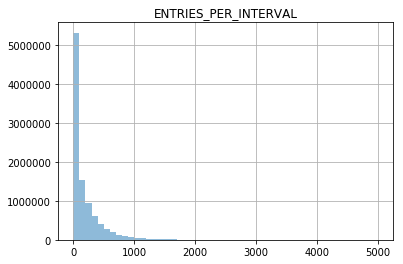

In [72]:
df_2013.loc[:,['ENTRIES_PER_INTERVAL']].hist(range = (0,5000), bins = (50), alpha = 0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016081B734A8>]], dtype=object)

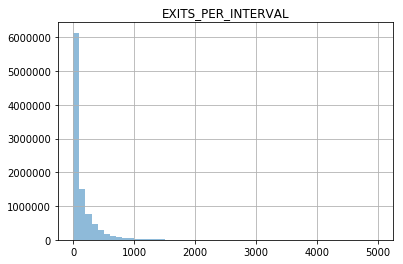

In [73]:
df_2013.loc[:,['EXITS_PER_INTERVAL']].hist(range = (0,5000), bins = (50), alpha = 0.5)

###### From the Plots of entries and exits intervals we observe some extreme values. Removing the outliers from the data

In [74]:
df_2013.ENTRIES_PER_INTERVAL.nlargest(10)

3462205    916848568.0
8052439    771438687.0
566968     741761603.0
1973140    677792266.0
9295084    652915237.0
4618116    643950387.0
1573266    635056593.0
9686630    532987680.0
2354150    501346770.0
1536823    501318557.0
Name: ENTRIES_PER_INTERVAL, dtype: float64

In [75]:
# Checking for negative values too
df_2013.loc[df_2013['ENTRIES_PER_INTERVAL']<0,].shape

(1418, 10)

In [76]:
# Based on the plots, choosing the cap value as 5000. Checking for the percent of data loss
cap = 5000
def perc_of_total_data(df_new,df_old):
    '''see how much cleaning a dataset reduced its size'''
    return float(df_new.shape[0]) / df_old.shape[0]

for col in ['ENTRIES_PER_INTERVAL','EXITS_PER_INTERVAL']:
    df_above_cap = df_2013[df_2013[col] > cap]
    print('capping {} to < {} removes {:.1%} of our data'.format(
            col, cap, perc_of_total_data(df_above_cap, df_2013)))

capping ENTRIES_PER_INTERVAL to < 5000 removes 0.0% of our data
capping EXITS_PER_INTERVAL to < 5000 removes 0.0% of our data


In [77]:
df_2013.loc[0 > df_2013['ENTRIES_PER_INTERVAL'], 'ENTRIES_PER_INTERVAL'] = np.nan
df_2013.loc[ 5000 < df_2013['ENTRIES_PER_INTERVAL'], 'ENTRIES_PER_INTERVAL'] = np.nan
df_2013.loc[0 > df_2013['EXITS_PER_INTERVAL'], 'EXITS_PER_INTERVAL'] = np.nan
df_2013.loc[ 5000 < df_2013['EXITS_PER_INTERVAL'], 'EXITS_PER_INTERVAL'] = np.nan

In [78]:
df_2013.dropna(inplace = True)
df_2013.reset_index(inplace = True, drop = True)

In [79]:
#Define busyness as the sum of entries per interval and exits per interval
df_2013['BUSYNESS'] = df_2013['ENTRIES_PER_INTERVAL']  + df_2013['EXITS_PER_INTERVAL'] 

In [80]:
df_2013.shape

(9778396, 11)

In [81]:
df_2013.head()

,STATION,LINENAME,DIVISION,TURNSTILE,DATE,TIME,ENTRIES,EXIT,ENTRIES_PER_INTERVAL,EXITS_PER_INTERVAL,BUSYNESS
0,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,03:00:00,3932284.0,1355714.0,15.0,7.0,22.0
1,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,07:00:00,3932299.0,1355721.0,28.0,53.0,81.0
2,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,11:00:00,3932327.0,1355774.0,100.0,37.0,137.0
3,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,15:00:00,3932427.0,1355811.0,235.0,38.0,273.0
4,LEXINGTON AVE,456NQR,BMT,A002 - R051 - 02-00-00,2013-01-01,19:00:00,3932662.0,1355849.0,120.0,15.0,135.0


### What is the total number of entries & exits across the subway system for August 1, 2013?
Select data for August month from the 2013 data

In [82]:
aug1_2013_df =  df_2013[df_2013['DATE'] == '2013-08-01'].copy()
aug1_2013_df.reset_index(inplace = True, drop = True)

In [83]:
print('Total number of entries:', aug1_2013_df['ENTRIES_PER_INTERVAL'].sum())
print('Total number of exits:', aug1_2013_df['EXITS_PER_INTERVAL'].sum())
print('Total number of entries & exits:', aug1_2013_df['ENTRIES_PER_INTERVAL'].sum() + aug1_2013_df['EXITS_PER_INTERVAL'].sum())

Total number of entries: 5488391.0
Total number of exits: 4337477.0
Total number of entries & exits: 9825868.0


### Let’s define the busy-ness as sum of entry & exit count. What station was the busiest on August 1, 2013? What turnstile was the busiest on that date?

In [84]:
df_busyness = aug1_2013_df.groupby('STATION')['BUSYNESS'].agg('sum').sort_values(ascending = False).reset_index().copy()

In [85]:
df_busyness.head()

,STATION,BUSYNESS
0,34 ST-PENN STA,331043.0
1,42 ST-GRD CNTRL,316094.0
2,34 ST-HERALD SQ,237077.0
3,42 ST-TIMES SQ,203278.0
4,14 ST-UNION SQ,195815.0


In [86]:
print('{} was the busiest on August 1,2013'.format(df_busyness['STATION'].iloc[0]))

34 ST-PENN STA was the busiest on August 1,2013


In [87]:
df_turnstile = aug1_2013_df.groupby('TURNSTILE')['BUSYNESS'].agg('sum').sort_values(ascending = False).reset_index().copy()

In [88]:
df_turnstile.head()

,TURNSTILE,BUSYNESS
0,N063A - R011 - 00-00-00,11845.0
1,R249 - R179 - 01-00-09,11523.0
2,R240 - R047 - 00-00-00,11057.0
3,R238 - R046 - 00-00-01,10566.0
4,N083 - R138 - 01-00-00,10469.0


In [89]:
print('{} turnstile was the busiest on August 1,2013'.format(df_turnstile['TURNSTILE'].iloc[0]))

N063A - R011 - 00-00-00 turnstile was the busiest on August 1,2013


### What stations have seen the most usage growth/decline in 2013?
To determine the usage growth/decline we can calculate either absolute busyness change or relative busyness change.

NOTE: Due to Hurricane Sandy many Subway stations closed and re-opened in 2013. So the busyness change is affected.


In [90]:
#Calculate the average of daily busyness per month per station
df_Stations = df_2013.groupby(['DATE','STATION']).agg({'BUSYNESS' : sum}).reset_index().sort_values(by = ['STATION','DATE'], ascending = True).reset_index(drop=True).copy()

In [91]:
df_Stations['MONTH'] = df_Stations['DATE'].dt.month

In [92]:
df_Stations = df_Stations.groupby(['STATION','MONTH'])['BUSYNESS'].agg(['mean']).reset_index()
#df_Stations.rename(columns = {'BUSYNESS':'DAILY-MEAN'})

In [93]:
df_Stations.columns

Index(['STATION', 'MONTH', 'mean'], dtype='object')

In [94]:
df_Stations = df_Stations.pivot(index='MONTH', columns='STATION', values='mean').dropna(1)

In [95]:
## Calculate the ranking percentage per month
rank_percent = pd.DataFrame(100*(df_Stations.loc[12] - df_Stations.loc[1])/df_Stations.loc[1] , columns = ['percent change']).dropna()

In [96]:
rank_percent = rank_percent.sort_values(by = ['percent change'], ascending = False).reset_index()

In [97]:
print("Below are the stations which have seen most usage/decline in 2013 with average of daily busyness per month per station")
rank_percent

Below are the stations which have seen most usage/decline in 2013 with average of daily busyness per month per station


,STATION,percent change
0,BEACH 90 ST,289800.000000
1,BEACH 44 ST,2256.014692
2,BEACH 36 ST,1061.157536
3,BEACH 67 ST,986.223384
4,BEACH 60 ST,592.983124
5,BEACH 25 ST,481.715472
6,FAR ROCKAWAY,233.907377
7,NEWARK HW BMEBE,102.253000
8,THIRTY ST,86.856099
9,LACKAWANNA,70.486165


###### 
Computing the absolute change based on average of daily busyness for the whole year

In [98]:
station_rank = pd.DataFrame((df_Stations.loc[12] - df_Stations.loc[1]) , 
                       columns = ['Daily_Avg_change']).dropna()

In [99]:
station_rank = station_rank.sort_values(by = ['Daily_Avg_change'],ascending = False).reset_index()

In [100]:
print("Below are the stations which have seen most usage/decline in 2013 with average of daily busyness change")
station_rank

Below are the stations which have seen most usage/decline in 2013 with average of daily busyness change


,STATION,Daily_Avg_change
0,34 ST-HERALD SQ,28851.032258
1,47-50 ST-ROCK,25768.096774
2,34 ST-PENN STA,19527.741935
3,42 ST-TIMES SQ,15656.548387
4,59 ST-COLUMBUS,12436.193548
5,PATH WTC,12184.161290
6,FULTON ST,10734.903226
7,BOWLING GREEN,10119.032258
8,THIRTY ST,8846.741935
9,42 ST-PA BUS TE,8337.000000


### What dates in 2013 are the least busy? Could you identify days in 2013 on which stations were not operating at full capacity or closed entirely?

In [101]:
df_dates = df_2013.groupby('DATE')['BUSYNESS'].aggregate({'BUSYNESS' : sum}).reset_index().sort_values(by = 'BUSYNESS', ascending = True).reset_index(drop=True).copy()

In [102]:
df_dates.columns

Index(['DATE', 'BUSYNESS'], dtype='object')

In [103]:
df_dates['DAY'] = df_dates['DATE'].dt.day

In [104]:
df_dates['MONTH'] = df_dates['DATE'].dt.strftime('%b')

In [106]:
print("The following dates are least busy in 2013")
df_dates[['DATE','BUSYNESS']].head(10)

The following dates are least busy in 2013


,DATE,BUSYNESS
0,2013-12-25,3277383.0
1,2013-11-28,4094174.0
2,2013-01-01,4131689.0
3,2013-01-27,4165459.0
4,2013-02-03,4205392.0
5,2013-01-13,4206314.0
6,2013-01-06,4218005.0
7,2013-02-24,4334455.0
8,2013-02-09,4346367.0
9,2013-02-10,4391733.0


Chirstmas, Thanksgiving and New year were least busy

In [107]:
df_dayofweek = df_dates.copy()
df_dayofweek['DATE'] = pd.to_datetime(df_dayofweek['DATE'])
df_dayofweek['day_of_week'] = df_dayofweek['DATE'].dt.weekday_name

In [108]:
df_dayofweek.head()

,DATE,BUSYNESS,DAY,MONTH,day_of_week
0,2013-12-25,3277383.0,25,Dec,Wednesday
1,2013-11-28,4094174.0,28,Nov,Thursday
2,2013-01-01,4131689.0,1,Jan,Tuesday
3,2013-01-27,4165459.0,27,Jan,Sunday
4,2013-02-03,4205392.0,3,Feb,Sunday


In [109]:
print("The average busyness per day of week is:")
df_dayofweek.groupby('day_of_week')['BUSYNESS'].mean().sort_values()

The average busyness per day of week is:


day_of_week
Sunday       4.781971e+06
Saturday     6.102477e+06
Monday       9.497675e+06
Tuesday      1.000828e+07
Friday       1.008132e+07
Thursday     1.011498e+07
Wednesday    1.023028e+07
Name: BUSYNESS, dtype: float64

Weekends are least busy compared to the week days.


If we want the busyness of a particular day number in the year we can interpret it in the below way.

In [110]:
#del df_days
df_days = df_2013.groupby(['STATION','DATE'])['BUSYNESS'].agg({'BUSYNESS':'sum'}).reset_index().sort_values(by = ['STATION','BUSYNESS'], ascending = True).reset_index(drop=True).copy()

In [111]:
df_days.columns

Index(['STATION', 'DATE', 'BUSYNESS'], dtype='object')

In [112]:
df_days = df_days.join(df_days.groupby(['STATION'])['BUSYNESS'].mean(), on='STATION', rsuffix='_MEAN') 
df_days = df_days.join(df_days.groupby(['STATION'])['BUSYNESS'].std(), on='STATION', rsuffix='_STD')

In [113]:
df_days.head()

,STATION,DATE,BUSYNESS,BUSYNESS_MEAN,BUSYNESS_STD
0,1 AVE,2013-11-17,31.0,43734.008219,9559.850657
1,1 AVE,2013-05-27,80.0,43734.008219,9559.850657
2,1 AVE,2013-11-16,98.0,43734.008219,9559.850657
3,1 AVE,2013-05-26,249.0,43734.008219,9559.850657
4,1 AVE,2013-05-25,365.0,43734.008219,9559.850657


In [114]:
def isclosed(value,mean,std):
    if value < 0.1 * std:
        return('closed')
    
    elif (value < mean - 1.5 * std) and (value > 0.1 * std):
        return('not at full capacity')
    else:
        return('normal')

df_days['IS_CLOSED'] = df_days.apply(lambda x:  isclosed(x['BUSYNESS'],x['BUSYNESS_MEAN'], x['BUSYNESS_STD']), axis = 1)

In [115]:
days_data = df_days.groupby(['STATION','IS_CLOSED'])['DATE'].aggregate({'DATE' : 'count'}).reset_index()

In [116]:
days_data.columns

Index(['STATION', 'IS_CLOSED', 'DATE'], dtype='object')

In [117]:
days_data. rename(columns={'DATE': 'day_number'}, inplace=True)

In [118]:
print("The following days in the year were closed and not at full capacity")
days_data.loc[days_data['IS_CLOSED'] != 'normal'].sort_values(by='IS_CLOSED')

The following days in the year were closed and not at full capacity


,STATION,IS_CLOSED,day_number
0,1 AVE,closed,5
267,AQUEDUCT TRACK,closed,122
269,AQUEDUCT-N CNDT,closed,6
646,MORGAN AVE,closed,12
643,MONTROSE AVE,closed,12
640,MIDDLETOWN ROAD,closed,1
638,METS-WILLETS PT,closed,1
631,MARBLE HILL-225,closed,12
628,MAIN ST,closed,4
298,BAY RIDGE AVE,closed,1


# Visualization:

### Plot the daily row counts for data files in Q3 2013.

In [119]:
# Create data of Q3
df_Q3_2013 = df_2013[(df_2013['DATE'] >= '07-01-13') & (df_2013['DATE'] <= '09-30-13')]

In [120]:
daily_counts = df_Q3_2013.sort_values('DATE').groupby('DATE')['DATE'].agg('count')

([<matplotlib.axis.XTick at 0x16043bbef98>,
 <a list of 7 Text xticklabel objects>)

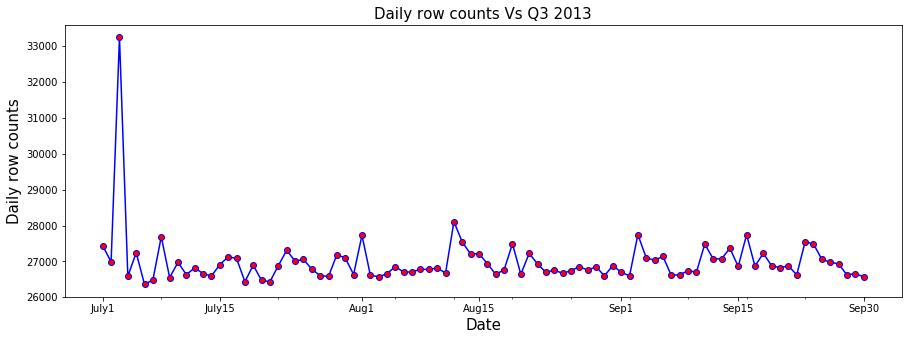

In [121]:
df_Q3_2013.sort_values('DATE').groupby('DATE')['DATE'].agg('count').plot( color = 'b', marker = '.', markersize=12,markerfacecolor = 'r')
plt.style.use('bmh')
fig = plt.gcf()
fig.set_size_inches(15, 5, forward=True)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily row counts', fontsize = 15)
plt.title('Daily row counts Vs Q3 2013', fontsize = 15)
plt.xticks(['07-01-13','07-15-13','08-01-13','08-15-13','09-01-13','09-15-13','09-30-13'], 
                                           ['July1','July15','Aug1','Aug15','Sep1','Sep15','Sep30'])

### Plot the daily total number of entries & exits across the system for Q3 2013.

In [122]:
df_tot_ent_exits = df_Q3_2013.sort_values('DATE').groupby('DATE')['ENTRIES_PER_INTERVAL','EXITS_PER_INTERVAL'].agg('sum')

In [123]:
df_tot_ent_exits.rename(columns = {'ENTRIES_PER_INTERVAL':'Total_num_of_Entries','EXITS_PER_INTERVAL':'Total_num_of_Exits'}
                                      ,inplace=True)

([<matplotlib.axis.YTick at 0x16049bda978>,
 <a list of 10 Text yticklabel objects>)

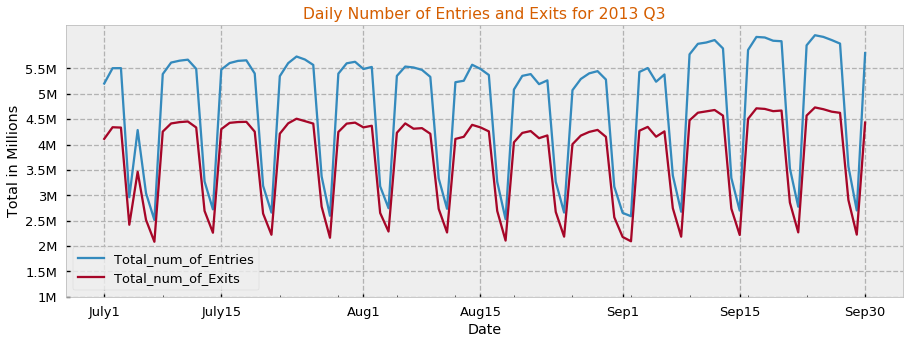

In [124]:
plt.style.use('seaborn-talk')
df_tot_ent_exits.plot()
fig = plt.gcf()
fig.set_size_inches(15, 5, forward=True)
plt.xlabel('Date')
plt.ylabel('Total in Millions')
plt.title('Daily Number of Entries and Exits for 2013 Q3',color='C4')
plt.xticks(['07-01-13','07-15-13','08-01-13','08-15-13','09-01-13','09-15-13','09-30-13'], 
                                          ['July1','July15','Aug1','Aug15','Sep1','Sep15','Sep30'])
plt.yticks((range(1000000,6000000,500000)),
           ['1M','1.5M','2M','2.5M','3M','3.5M','4M','4.5M','5M','5.5M','6M','6.5M','7M'])

### Plot the mean and standard deviation of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA.

In [125]:
df_Q3_2013['MONTH'] = df_Q3_2013['DATE'].dt.month

In [126]:
df_Q3_entries = df_Q3_2013[df_Q3_2013['STATION'] == '34 ST-PENN STA'].groupby(['MONTH','DATE'])['ENTRIES_PER_INTERVAL'].aggregate({'ENTRIES_PER_INTERVAL' : sum}).reset_index().copy()

In [127]:
df_Q3_exits = df_Q3_2013[df_Q3_2013['STATION'] == '34 ST-PENN STA'].groupby(['MONTH','DATE'])['EXITS_PER_INTERVAL'].aggregate({'EXITS_PER_INTERVAL' : sum}).reset_index().copy()

In [128]:
df_Q3_entries_new = df_Q3_entries.groupby('MONTH').agg(['mean','std'])
df_Q3_entries_new.columns = ['Total_Entries_Mean','Total_Entries_Std']
df_Q3_exits_new = df_Q3_exits.groupby('MONTH').agg(['mean','std'])
df_Q3_exits_new.columns = ['Total_Exits_Mean','Total_Exits_Std']

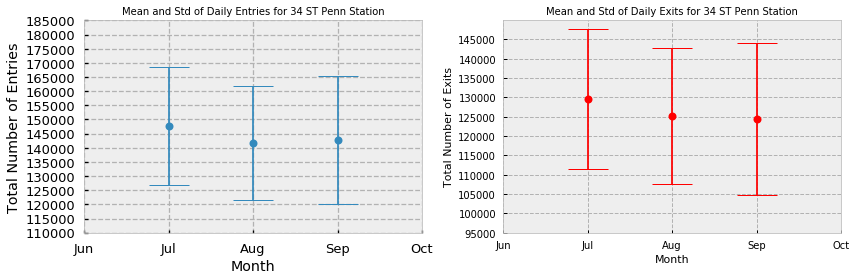

In [129]:
### Plotting for Entries
plt.subplot(1,2,1)
plt.style.use('seaborn-notebook')
fig = plt.gcf()
fig.set_size_inches(12, 4, forward=True)
Month = [7,8,9]
Mean_of_Entries = df_Q3_entries_new['Total_Entries_Mean']
Std_of_Entries = df_Q3_entries_new['Total_Entries_Std']/2

(_, caps, _) = plt.errorbar(Month, Mean_of_Entries, yerr =  Std_of_Entries, fmt='o', markersize=8, capsize=20)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.xticks([6,7,8,9,10],['Jun','Jul','Aug','Sep','Oct'])
plt.yticks(range(110000,190000,5000))
plt.xlabel('Month')
plt.ylabel('Total Number of Entries')
plt.title('Mean and Std of Daily Entries for 34 ST Penn Station', fontsize = 10)
#plt.show()

### Plotting for Exits
plt.subplot(1,2,2)
Month = [7,8,9]
Mean_of_Exits = df_Q3_exits_new['Total_Exits_Mean'] 
Std_of_Exits = df_Q3_exits_new['Total_Exits_Std']/2

(_, caps, _) = plt.errorbar(Month, Mean_of_Exits, yerr =  Std_of_Exits, c = 'r',fmt='o', markersize=8, capsize=20)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.xticks([6,7,8,9,10],['Jun','Jul','Aug','Sep','Oct'])
plt.yticks(range(95000,150000,5000))
plt.xlabel('Month')
plt.ylabel('Total Number of Exits')
plt.title('Mean and Std of Daily Exits for 34 ST Penn Station', fontsize = 10)
plt.tight_layout()
plt.show()

In [130]:
df_entries_exits = df_Q3_2013[df_Q3_2013['STATION'] == '34 ST-PENN STA'].groupby(['MONTH','DATE'])['BUSYNESS'].aggregate({'BUSYNESS' : sum}).reset_index().copy()
df_entries_exits['WEEKDAY'] =  df_entries_exits['DATE'].dt.weekday < 5

Text(0.5,1,'Mean and Standard deviation of the daily total number of entries & exits \n for each month in Q3 2013')

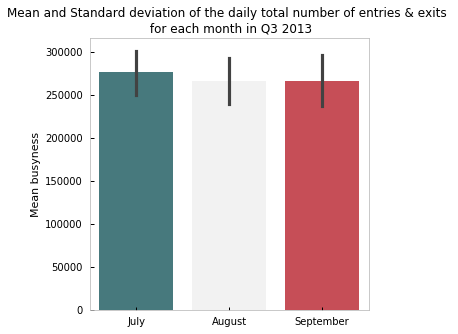

In [131]:
f, ax = plt.subplots(figsize=(5, 5))
ax.grid(False)
ax.set_facecolor("white")
ax = sns.barplot(x="MONTH", y="BUSYNESS", data=df_entries_exits, palette= sns.diverging_palette(200, 10, n=3))
ax.set(xlabel='', ylabel='Mean busyness')
ax.set_xticklabels(['July','August','September'])
#ax.set_yticks(range(0,300000,15000))
plt.title('Mean and Standard deviation of the daily total number of entries & exits \n for each month in Q3 2013')
#plt.rcParams['figure.facecolor'] = 'white'

### Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA.

Text(0.5,1,'25/50/75 percentile of the daily total number of entries & exits \n for each month in Q3 2013 for station 34 ST-PENN STA.')

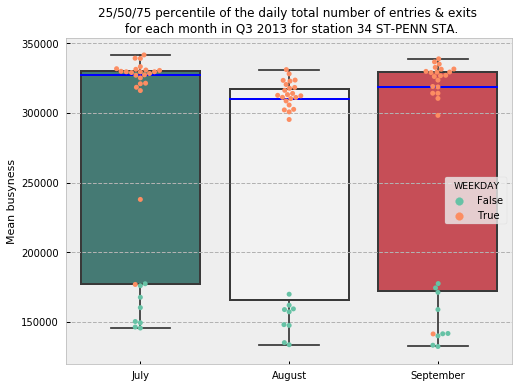

In [132]:
f, ax = plt.subplots(figsize=(8, 6))
boxprops = dict(linewidth=2)
medianprops = dict(linewidth=2, color='blue')
ax = sns.boxplot(x="MONTH", y="BUSYNESS", data=df_entries_exits, palette = sns.diverging_palette(180, 10, n=3),boxprops=boxprops,medianprops=medianprops)

ax = sns.swarmplot(x="MONTH", y="BUSYNESS", hue ="WEEKDAY", data=df_entries_exits, palette = "Set2")

ax.set(xlabel='', ylabel='Mean busyness')
ax.set_xticklabels(['July','August','September'])
plt.title('25/50/75 percentile of the daily total number of entries & exits \n for each month in Q3 2013 for station 34 ST-PENN STA.')

25 percentile - the lower edge of the boxes ;
50 percentile - the blue line ;
75 percentile - the upper edge of the boxes

### Plot the daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013.

In [133]:
df_is_closed = df_Q3_2013.groupby(['STATION','DATE'])['BUSYNESS'].aggregate({'BUSYNESS' : sum}).reset_index().sort_values(by = ['STATION','BUSYNESS'], ascending = True).reset_index(drop=True).copy()
df_is_closed = df_is_closed.join(df_is_closed.groupby(['STATION'])['BUSYNESS'].mean(), on='STATION', rsuffix='_MEAN') 
df_is_closed = df_is_closed.join(df_is_closed.groupby(['STATION'])['BUSYNESS'].std(), on='STATION', rsuffix='_STD')

In [134]:
df_is_closed['IS_CLOSED'] = df_is_closed.apply(lambda x:  isclosed(x['BUSYNESS'],x['BUSYNESS_MEAN'], x['BUSYNESS_STD']), axis = 1)

In [135]:
plot_data = df_is_closed.groupby(['DATE','IS_CLOSED'])['STATION'].aggregate({'STATION' : 'count'}).reset_index().pivot(index='DATE', columns='IS_CLOSED', values='STATION')

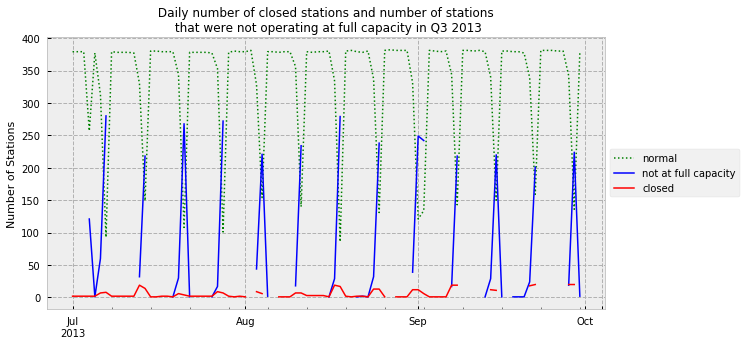

In [136]:
f, ax = plt.subplots(figsize=(10, 5))

width = 0.4

plot_data['normal'].plot(linewidth=1.5,linestyle=':',color='green', ax=ax)
plot_data['not at full capacity'].plot(linewidth=1.5, color='blue', ax=ax)
plot_data['closed'].plot(linewidth=1.5,color='red', ax=ax)
ax.set_ylabel('Number of Stations')
ax.set_xlabel('')
plt.title(' Daily number of closed stations and number of stations \n that were not operating at full capacity in Q3 2013')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))